Preparations:
Import Dependencies and Data

In [124]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [125]:

!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [126]:
import tensorflow as tf

tf.config.run_functions_eagerly(True)

In [127]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [128]:
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

Part Two:
Import Dataset from google drive

In [129]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: missing destination file operand after '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp'
Try 'cp --help' for more information.


In [130]:
import os
# Specify the path to the dataset
dataset_path = '/tmp/Knight'
print(len(os.listdir('/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp')))
# Specify the directory to save images
save_directory = '/content/drive/MyDrive/Datasets/Images'

98


In [131]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the dataset on your Google Drive
dataset_path = '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp'

# Get a list of file paths in the dataset directory
file_paths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path)]

# Now, file_paths contains the paths to the files in your dataset
print(file_paths)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000022.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000009.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000024.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000023.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000019.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000017.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000021.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000010.JPG', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000018.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000012.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000013.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000028.jpg', '/cont

In [132]:
# Use the tensorflow datasets api to bring in the data source
ds = tf.data.Dataset.from_tensor_slices(file_paths)
print(len(os.listdir('/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp')))


98


In [133]:
# Do some data transformation
import numpy as np

In [134]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

part 3:
Visualize and build dataset

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

# Create an ImageDataGenerator for images
image_data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(255, 255),  # Adjust target size as needed
    batch_size=1,  # Batch size for the iterator
    class_mode='categorical',  # Adjust class mode based on your labels
    shuffle=True  # Shuffle the data
)

Found 0 images belonging to 0 classes.


In [136]:
os.listdir(dataset_path)

['00000022.jpg',
 '00000009.jpg',
 '00000024.jpg',
 '00000023.jpg',
 '00000019.jpg',
 '00000017.jpg',
 '00000021.jpg',
 '00000010.JPG',
 '00000018.jpg',
 '00000012.jpg',
 '00000013.jpg',
 '00000028.jpg',
 '00000137.jpg',
 '00000186.jpg',
 '00000188.png',
 '00000190.jpg',
 '00000101.jpg',
 '00000155.jpg',
 '00000046.jpg',
 '00000197.jpg',
 '00000114.jpg',
 '00000177.jpg',
 '00000067.jpg',
 '00000079.jpg',
 '00000041.jpg',
 '00000026.jpg',
 '00000048.jpg',
 '00000170.png',
 '00000074.jpg',
 '00000162.jpg',
 '00000192.jpg',
 '00000058.png',
 '00000037.jpg',
 '00000034.JPG',
 '00000128.jpg',
 '00000032.jpg',
 '00000094.jpg',
 '00000078.jpg',
 '00000043.jpg',
 '00000181.jpg',
 '00000145.jpg',
 '00000055.jpg',
 '00000065.jpg',
 '00000179.jpg',
 '00000142.jpg',
 '00000059.jpg',
 '00000047.jpg',
 '00000167.jpg',
 '00000088.jpg',
 '00000071.jpg',
 '00000036.jpg',
 '00000106.jpg',
 '00000146.jpg',
 '00000030.jpg',
 '00000029.jpg',
 '00000198.png',
 '00000038.jpg',
 '00000196.jpg',
 '00000141.jpg

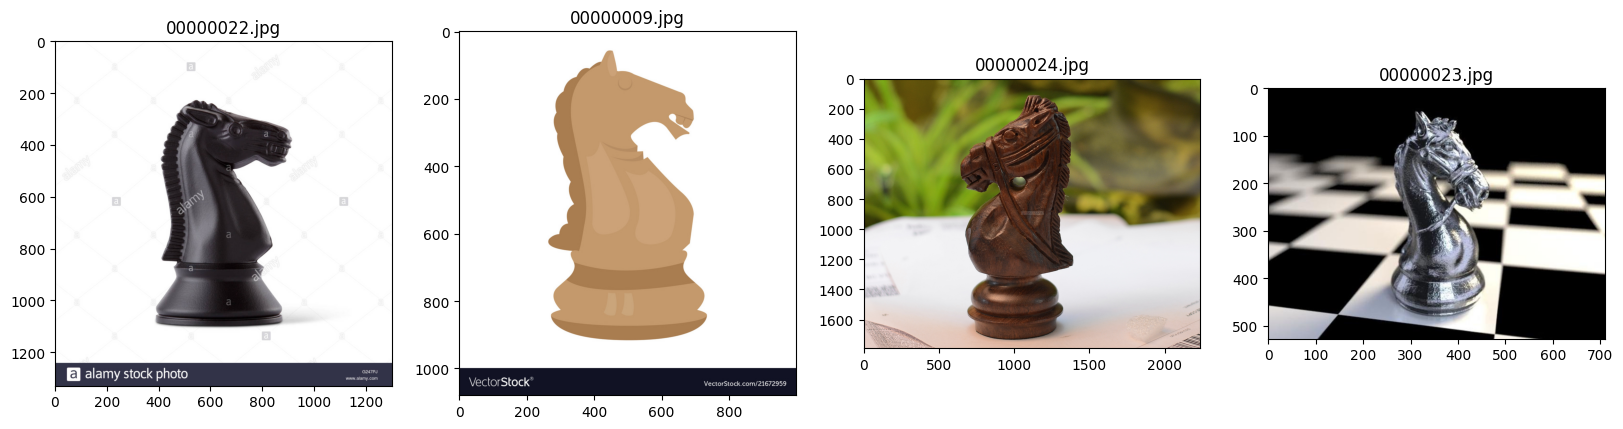

In [137]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Assuming you have a list of image file names in dataset_path
image_file_names = os.listdir(dataset_path)

# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Loop through the first four images and display them
for idx in range(4):
    # Construct the full path to the image file
    image_path = os.path.join(dataset_path, image_file_names[idx])

    # Open the image using PIL
    img = Image.open(image_path)

    # Plot the image using a specific subplot
    ax[idx].imshow(img)
    # Append the image file name as the plot title
    ax[idx].title.set_text(image_file_names[idx])

plt.show()


Part 4:
Reload Dataset and Scale images

In [182]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: missing destination file operand after '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp'
Try 'cp --help' for more information.


In [183]:

# Specify the path to the dataset on your Google Drive
dataset_path = '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp'

# Create the directory if it does not exist
if not os.path.exists(dataset_path):
  os.makedirs(dataset_path)

# Get a list of file paths in the dataset directory
file_paths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path)]

# Now, file_paths contains the paths to the files in your dataset
print(file_paths)



['/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000022.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000009.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000024.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000023.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000019.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000017.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000021.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000010.JPG', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000018.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000012.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000013.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000028.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/00000137.jpg', '/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp/000001

In [184]:
# Scale and return images only
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def scale_images(image_filename, desired_height=255, desired_width=255):
    # Construct the full path to the image file
    image_path = os.path.join(dataset_path, str(image_filename))

    # Load the image and resize it
    image = load_img(image_path, target_size=(desired_height, desired_width))

    # Convert the image to a NumPy array
    image_array = img_to_array(image)

    # Scale the pixel values
    scaled_image = image_array / 255.0

    return scaled_image


In [185]:
# Reload the dataset
ds = tf.data.Dataset.from_tensor_slices(file_paths)
os.listdir(dataset_path)


['00000022.jpg',
 '00000009.jpg',
 '00000024.jpg',
 '00000023.jpg',
 '00000019.jpg',
 '00000017.jpg',
 '00000021.jpg',
 '00000010.JPG',
 '00000018.jpg',
 '00000012.jpg',
 '00000013.jpg',
 '00000028.jpg',
 '00000137.jpg',
 '00000186.jpg',
 '00000188.png',
 '00000190.jpg',
 '00000101.jpg',
 '00000155.jpg',
 '00000046.jpg',
 '00000197.jpg',
 '00000114.jpg',
 '00000177.jpg',
 '00000067.jpg',
 '00000079.jpg',
 '00000041.jpg',
 '00000026.jpg',
 '00000048.jpg',
 '00000170.png',
 '00000074.jpg',
 '00000162.jpg',
 '00000192.jpg',
 '00000058.png',
 '00000037.jpg',
 '00000034.JPG',
 '00000128.jpg',
 '00000032.jpg',
 '00000094.jpg',
 '00000078.jpg',
 '00000043.jpg',
 '00000181.jpg',
 '00000145.jpg',
 '00000055.jpg',
 '00000065.jpg',
 '00000179.jpg',
 '00000142.jpg',
 '00000059.jpg',
 '00000047.jpg',
 '00000167.jpg',
 '00000088.jpg',
 '00000071.jpg',
 '00000036.jpg',
 '00000106.jpg',
 '00000146.jpg',
 '00000030.jpg',
 '00000029.jpg',
 '00000198.png',
 '00000038.jpg',
 '00000196.jpg',
 '00000141.jpg

In [186]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

def scale_images(image_path_tensor):
    # Convert the tensor to a string (assuming it's a tensor of file paths)
    image_path = tf.strings.as_string(image_path_tensor)  # Convert to string

    # Read the image file
    image = tf.io.read_file(image_path)

    # Extract the file extension
    file_extension = tf.strings.split(image_path, sep='.')[-1]

    # Decode the image based on the file extension
    if tf.strings.regex_full_match(file_extension, 'jpe?g|png|bmp'):
        image = tf.image.decode_image(image, channels=3)
    else:
        # For other formats, use decode_gif as an example; you may need to adjust based on the actual format
        image = tf.image.decode_gif(image)

    # Resize the image with padding to the desired size
    image = tf.image.resize_with_pad(image, target_height=desired_height, target_width=desired_width)

    # Convert the image to a NumPy array
    image_array = tf.image.convert_image_dtype(image, dtype=tf.float32)

    return image_array





# Assuming you have specified desired_height and desired_width
desired_height = 255
desired_width = 255

# Reload the dataset and use tf.py_function to map the function
ds = tf.data.Dataset.from_tensor_slices(file_paths)
ds = ds.map(lambda x: tf.py_function(func=scale_images, inp=[x], Tout=tf.float32))

# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(26)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(32)


In [187]:
ds = ds.map(scale_images)

In [190]:
ds = tf.data.Dataset.from_tensor_slices(file_paths)
ds = ds.map(lambda x: tf.py_function(func=scale_images, inp=[x], Tout=tf.float32))
print(len(os.listdir('/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp')))


98


In [191]:
for image in ds:
    print("Image shape:", image.shape)

Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (1, 255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (1, 255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255

In [192]:
ds = ds.filter(lambda img: tf.shape(img)[0] != 1)

In [193]:
for image in ds:
    print("Image shape:", image.shape)
print(len(os.listdir('/content/drive/MyDrive/Datasets/Chess_Vision/Knight/tmp')))


Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
I

In [194]:
ds.as_numpy_iterator().next().shape


(255, 255, 3)

Part 5:
Build neural network

In [195]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

5.1
Build Generator

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, UpSampling2D, Conv2D

def build_generator(input_shape):
    model = Sequential()

    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))

    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv layer to get to one channel
    model.add(Conv2D(3, 4, padding='same', activation='sigmoid'))

    return model

# Example usage:
desired_height = 255
desired_width = 255
image_shape = (desired_height, desired_width, 1)  # Assuming 1 channel

#generator = build_generator(input_shape=(128,) + image_shape)


In [197]:
generator = build_generator(input_shape=(128,) + image_shape)


In [198]:
generator.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_39 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_6 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_12 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [199]:
img = generator.predict(np.random.randn(4,128,1))


1/1 [==============================] - 0s 27ms/step


In [200]:
os.listdir(dataset_path)

['00000022.jpg',
 '00000009.jpg',
 '00000024.jpg',
 '00000023.jpg',
 '00000019.jpg',
 '00000017.jpg',
 '00000021.jpg',
 '00000010.JPG',
 '00000018.jpg',
 '00000012.jpg',
 '00000013.jpg',
 '00000028.jpg',
 '00000137.jpg',
 '00000186.jpg',
 '00000188.png',
 '00000190.jpg',
 '00000101.jpg',
 '00000155.jpg',
 '00000046.jpg',
 '00000197.jpg',
 '00000114.jpg',
 '00000177.jpg',
 '00000067.jpg',
 '00000079.jpg',
 '00000041.jpg',
 '00000026.jpg',
 '00000048.jpg',
 '00000170.png',
 '00000074.jpg',
 '00000162.jpg',
 '00000192.jpg',
 '00000058.png',
 '00000037.jpg',
 '00000034.JPG',
 '00000128.jpg',
 '00000032.jpg',
 '00000094.jpg',
 '00000078.jpg',
 '00000043.jpg',
 '00000181.jpg',
 '00000145.jpg',
 '00000055.jpg',
 '00000065.jpg',
 '00000179.jpg',
 '00000142.jpg',
 '00000059.jpg',
 '00000047.jpg',
 '00000167.jpg',
 '00000088.jpg',
 '00000071.jpg',
 '00000036.jpg',
 '00000106.jpg',
 '00000146.jpg',
 '00000030.jpg',
 '00000029.jpg',
 '00000198.png',
 '00000038.jpg',
 '00000196.jpg',
 '00000141.jpg

1/1 [==============================] - 0s 25ms/step


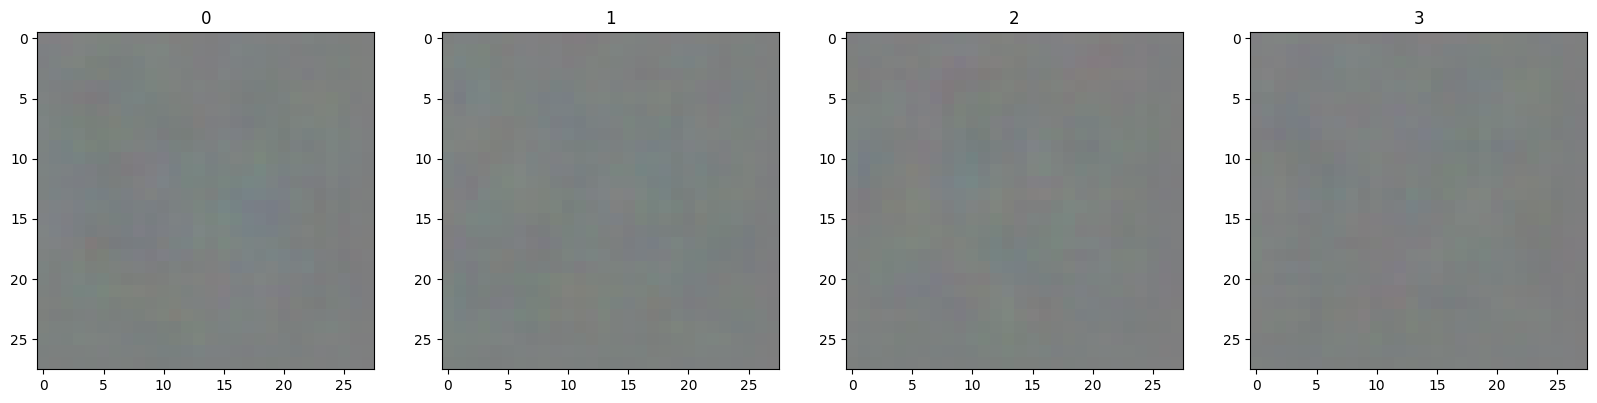

In [201]:
# Generate new pieces
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, img in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)

Part 5.2
Build discriminator

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dense

def build_discriminator(input_shape=(255, 255, 3)):
    model = Sequential()

    # Convolutional Blocks
    model.add(Conv2D(64, 5, strides=2, input_shape=input_shape, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 5, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(256, 5, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))

    # Flatten then pass to dense layer
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(1, activation='sigmoid'))

    return model






In [203]:
# Create the discriminator with the desired input shape
discriminator = build_discriminator(input_shape=(255, 255, 3))

In [204]:
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 128, 128, 64)      4864      
                                                                 
 leaky_re_lu_44 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 conv2d_45 (Conv2D)          (None, 64, 64, 128)       204928    
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 256)       819456    
                                                                 
 leaky_re_lu_46 (LeakyReLU)  (None, 32, 32, 256)       0         
                                                                 
 flatten_3 (Flatten)         (None, 262144)          

In [205]:
img = img[0]

In [206]:
img = tf.expand_dims(img, 0)
img = tf.image.resize(img, (28, 28))

In [207]:
img.shape

TensorShape([28, 28, 3])

In [208]:
for image in ds:
    print("Image shape:", image.shape)

Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
I

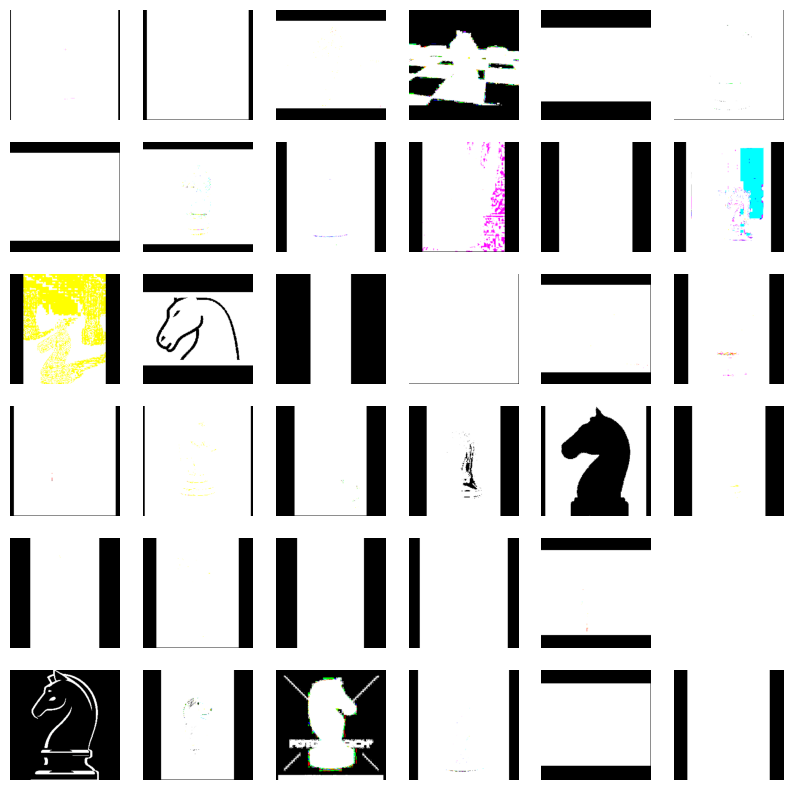

In [209]:
import matplotlib.pyplot as plt

# Assuming ds is a dataset containing your images
fig, axes = plt.subplots(6, 6, figsize=(10, 10))

for i, image in enumerate(ds.take(36)):  # Display the first 36 images
    ax = axes[i // 6, i % 6]
    ax.imshow(image.numpy())
    ax.axis('off')

plt.show()


In [212]:
for image in ds:
    print("Image shape:", image.shape)

Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
I

Part 6
Construct Training loop

6.1 Setup losses and optimizers

In [213]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [214]:
g_opt = Adam(learning_rate=0.0002)
d_opt = Adam(learning_rate=0.0002)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Part 6.2:
Build subclassed model

In [215]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [216]:
import tensorflow as tf
from tensorflow.keras.models import Model

class ChessGAN(Model):
    def __init__(self, generator, discriminator, image_shape, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator
        self.image_shape = image_shape

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        real_images = preprocess_real_images(real_images, self.image_shape)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Generate random noise with the same batch size
            noise = tf.random.normal((tf.shape(real_images)[0], 128))
            # Generate fake images with the generator
            fake_images = self.generator(noise, training=False)
            fake_images_resized = tf.image.resize(fake_images, (255, 255))  # Resize fake images
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images_resized, training=True)  # Use resized fake images
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate random noise with the same batch size
            noise = tf.random.normal((tf.shape(real_images)[0], 128))
            # Generate fake images with the generator
            gen_images = self.generator(noise, training=True)
            gen_images_resized = tf.image.resize(gen_images, (255, 255))  # Resize generated images
            predicted_labels = self.discriminator(gen_images_resized, training=False)  # Use resized generated images
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss": total_d_loss, "g_loss": total_g_loss}


def preprocess_real_images(images, target_shape):
    resized_images = tf.image.resize(images, target_shape[:2])
    if target_shape[2] == 1 and resized_images.shape[-1] == 3:
        resized_images = tf.image.rgb_to_grayscale(resized_images)
    return resized_images



In [217]:
image_shape = (desired_height, desired_width, 3)

# Build the generator using the updated image_shape
generator = build_generator(input_shape=(128,) + image_shape)

In [218]:
for image in ds:
    print("Image shape:", image.shape)

Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
Image shape: (255, 255, 3)
I

In [219]:
# Create instance of subclassed model
chessgan = ChessGAN(generator, discriminator, (desired_height, desired_width, 3))

In [220]:
# Compile the model
chessgan.compile(g_opt, d_opt, g_loss, d_loss)

Part 6.3: Build Callback

In [221]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [222]:

class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.save_directory = '/content/drive/MyDrive/Generated_Images1'  # Change this to your desired directory

        # Ensure the directory exists
        os.makedirs(self.save_directory, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()

        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            image_filename = f'generated_img_{epoch}_{i}.png'
            image_path = os.path.join(self.save_directory, image_filename)
            img.save(image_path)


In [223]:
save_directory = '/content/drive/MyDrive/Generated_Images2'
save_directory = '/content/drive/MyDrive/Generated_Images2/Epoch_{epoch}'


Part 6.3 Train GANs

In [224]:
ds = ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
hist = chessgan.fit(ds, epochs=100, callbacks=[ModelMonitor()])

Epoch 1/100
3/3 [==============================] - 3s 984ms/step - d_loss: 1.1828 - g_loss: 0.2375
Epoch 2/100
3/3 [==============================] - 3s 1s/step - d_loss: 1.9383 - g_loss: 0.2547
Epoch 3/100
3/3 [==============================] - 3s 1s/step - d_loss: 2.1663 - g_loss: 0.0298
Epoch 4/100
3/3 [==============================] - 3s 1s/step - d_loss: 1.7974 - g_loss: 0.2672
Epoch 5/100
3/3 [==============================] - 3s 1s/step - d_loss: 2.0348 - g_loss: 0.4352
Epoch 6/100
3/3 [==============================] - 3s 1s/step - d_loss: 1.6535 - g_loss: 0.0936
Epoch 7/100
3/3 [==============================] - 3s 998ms/step - d_loss: 1.7898 - g_loss: 0.1207
Epoch 8/100
3/3 [==============================] - 3s 1s/step - d_loss: 1.6677 - g_loss: 0.2111
Epoch 9/100
3/3 [==============================] - 3s 1s/step - d_loss: 1.5881 - g_loss: 0.1914
Epoch 10/100
3/3 [==============================] - 3s 1s/step - d_loss: 1.3921 - g_loss: 0.2873
Epoch 11/100
3/3 [===============

Part 6.4 Review performance of model

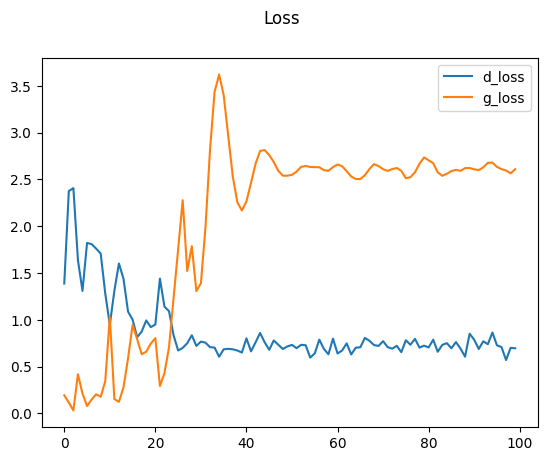

In [225]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

Part 7: Test generator

In [227]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))


1/1 [==============================] - 0s 469ms/step


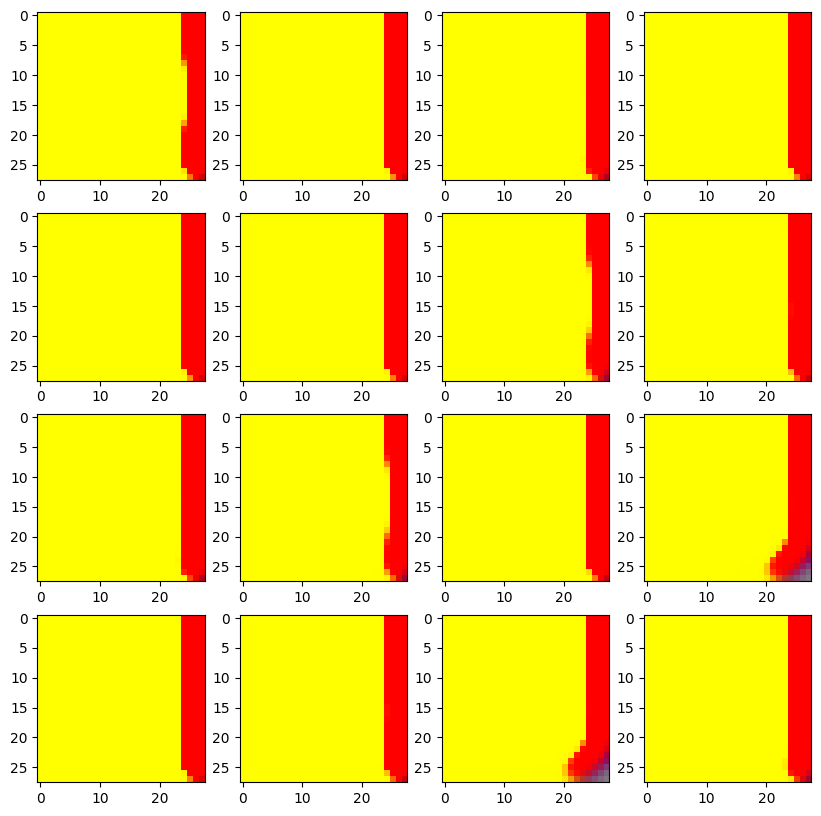

In [228]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [229]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
print("Gans have been generated")


Gans have been generated
